<a href="https://colab.research.google.com/github/Ratnasari124/Mechine_Learning_Ratnasari/blob/main/Ratnasari_2241720007_Mesin_Learning__JS_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Job Sheet 12**

**Optical Character Recognition (OCR)**


---


Nama : Ratnasari

Kelas : TI 3D

NIM : 2241720007

Absen : 25

---



Link Jobsheet : https://polinema.gitbook.io/jti-modul-praktikum-pembelajaran-mesin/job-sheet-12-optical-character-recognition-ocr

Link Github : https://github.com/Ratnasari124/Mechine_Learning_Ratnasari/blob/main/Ratnasari_2241720007_Mesin_Learning__JS_12.ipynb

Asset : https://drive.google.com/drive/folders/1rMHCkWjpeiztpFHbRK8eci9UL3EBk6al

# Praktikum 1

---


OCR with Pytesseract and OpenCV

1. Instalasi dan Import Library

In [1]:
!sudo apt install tesseract-ocr
!pip install pytesseract
!pip install opencv-python

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 3s (1,739 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [20]:
import re
import cv2
import numpy as np
import pytesseract
from pytesseract import Output
from matplotlib import pyplot as plt

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
IMG_DIR = '/content/drive/MyDrive/ratna/ML/Images/'

2. Preprocessing images dengan OpenCV

Pada tahap ini kita akan akan menulis fungsi dasar untuk metode prapemrosesan yang berbeda, meliputi:

- grayscaling

- thresholding

- dilating

- eroding

- opening

- canny edge detection

- noise removal

- deskwing

- template matching

Metode yang berbeda dapat berguna untuk jenis gambar yang berbeda

In [52]:
# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)

#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)

#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)

Mari kita bekerja dengan sebuah contoh Image untuk melihat segalanya dengan lebih baik. Seperti inilah gambar asli sebelum di proses



---



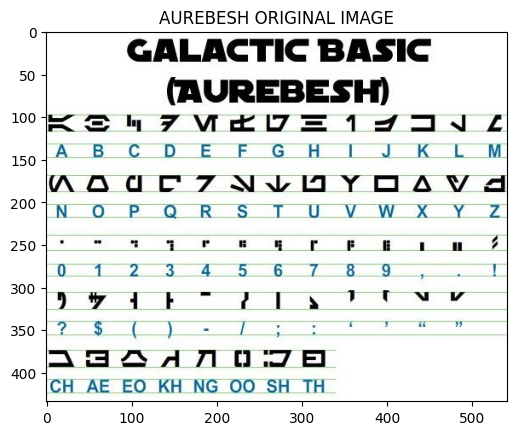

In [32]:
# Plot original image

image = cv2.imread(IMG_DIR + 'aurebesh.jpg')
b,g,r = cv2.split(image)
rgb_img = cv2.merge([r,g,b])
plt.imshow(rgb_img)
plt.title('AUREBESH ORIGINAL IMAGE')
plt.show()

Selanjutnya lakukan pre-processing, dan setelah dilakukan preprocessing dengan kode berikut, makan akan didapatkan hasil imgae baru

---



In [33]:
# Preprocess image

gray = get_grayscale(image)
thresh = thresholding(gray)
opening = opening(gray)
canny = canny(gray)
images = {'gray': gray,
          'thresh': thresh,
          'opening': opening,
          'canny': canny}

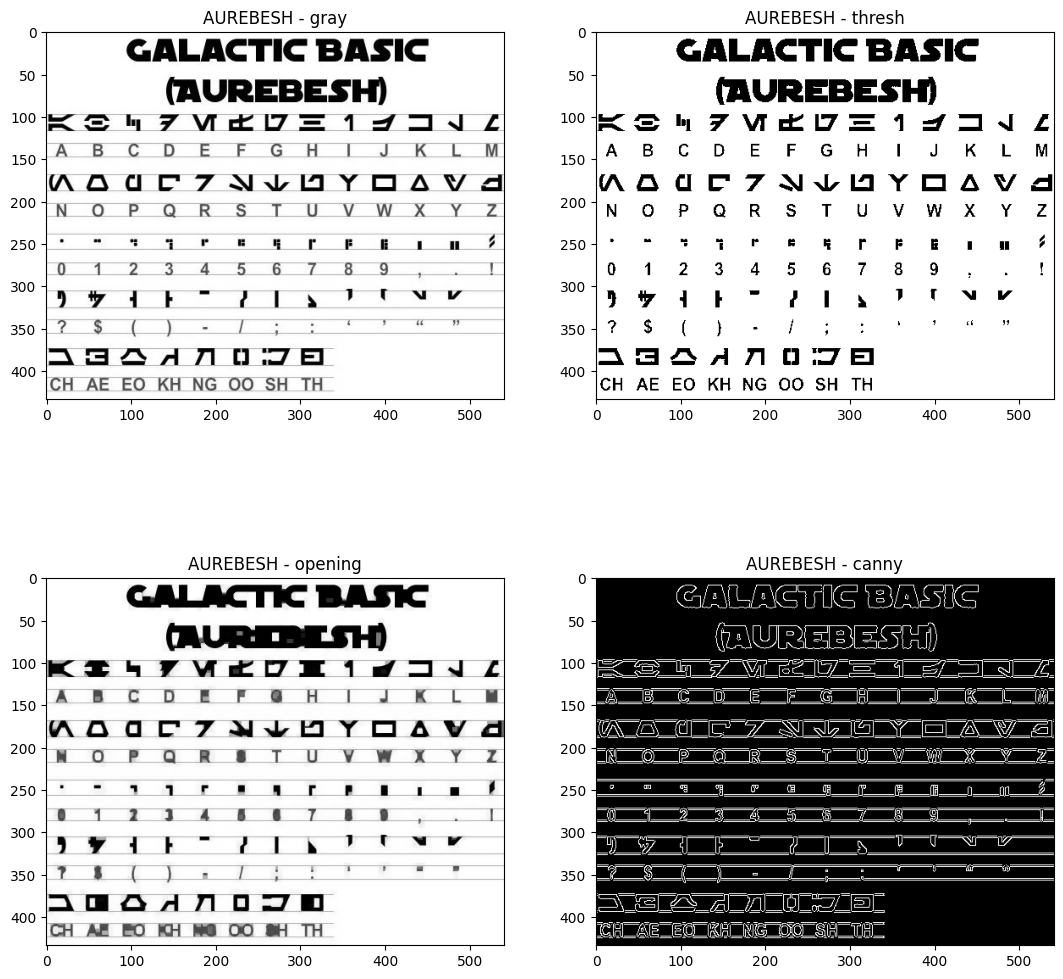

In [34]:
# Plot images after preprocessing

fig = plt.figure(figsize=(13,13))
ax = []

rows = 2
columns = 2
keys = list(images.keys())
for i in range(rows*columns):
    ax.append( fig.add_subplot(rows, columns, i+1) )
    ax[-1].set_title('AUREBESH - ' + keys[i])
    plt.imshow(images[keys[i]], cmap='gray')

In [35]:
# Get OCR output using Pytesseract

custom_config = r'--oem 3 --psm 6'
print('-----------------------------------------')
print('TESSERACT OUTPUT --> ORIGINAL IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> THRESHOLDED IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> OPENED IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> CANNY EDGE IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))

-----------------------------------------
TESSERACT OUTPUT --> ORIGINAL IMAGE
-----------------------------------------
GALACTIC BASIC
(AUREBESH)

RE TFVMVEVEStZIoNe
AB CD EF Ga KL
AOderT7NVYoYoOoOAVA
N_ Oo. 2 _ HG: Re SS Ty wee Ve
Ss eg ei
ed
i a a Sy ee ee ee
st
ASaSAnNADIE
CH AE EO KH NG OO SH TH


-----------------------------------------
TESSERACT OUTPUT --> THRESHOLDED IMAGE
-----------------------------------------
GALACTIC BASIC
(AUREBESH)

RE TFVMVEVEStZIoNe
AB CD EF Ga KL
AOderT7NVYoYoOoOAVA
N_ Oo. 2 _ HG: Re SS Ty wee Ve
Ss eg ei
ed
i a a Sy ee ee ee
st
ASaSAnNADIE
CH AE EO KH NG OO SH TH


-----------------------------------------
TESSERACT OUTPUT --> OPENED IMAGE
-----------------------------------------
GALACTIC BASIC
(AUREBESH)

RE TFVMVEVEStZIoNe
AB CD EF Ga KL
AOderT7NVYoYoOoOAVA
N_ Oo. 2 _ HG: Re SS Ty wee Ve
Ss eg ei
ed
i a a Sy ee ee ee
st
ASaSAnNADIE
CH AE EO KH NG OO SH TH


-----------------------------------------
TESSERACT OUTPUT --> CANNY EDGE IMAGE
-------

# Praktikum 2

---


Mendapatkan bounding box di sekitar teks pada image

## 1. Bounding Box - Level Karakter

---



Skrip di bawah ini akan memberikan informasi bounding box untuk setiap karakter yang terdeteksi oleh tesseract selama proses OCR.

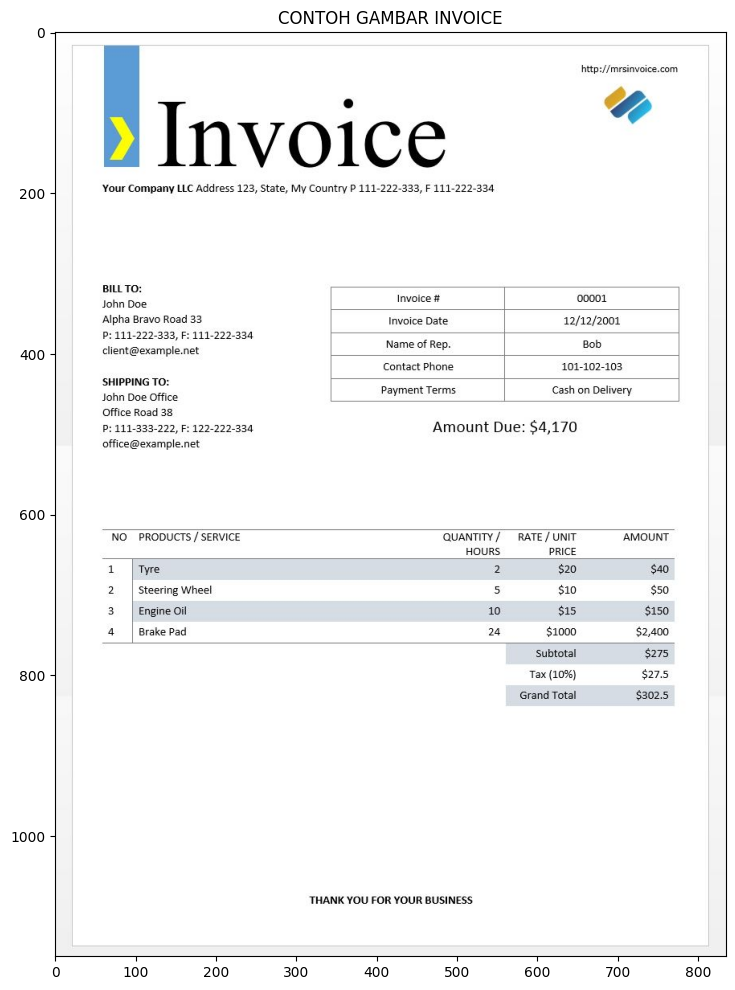

In [36]:
# Plot gambar original

# Membaca gambar dari direktori
image = cv2.imread(IMG_DIR + 'invoice-sample.jpg')

# Memisahkan saluran warna (blue, green, red) karena matplotlib menggunakan skema warna RGB
b, g, r = cv2.split(image)
rgb_img = cv2.merge([r, g, b])

# Menampilkan gambar dalam ukuran tertentu
plt.figure(figsize=(16, 12))
plt.imshow(rgb_img)
plt.title('CONTOH GAMBAR INVOICE')
plt.show()


Langkah selanjutnya adalah, Plot karakter boxes pada gambar menggunakan fungsi pytesseract.image_to_boxes()

---



kode program berikut akan memberikan hasil bounding box pada image invoice

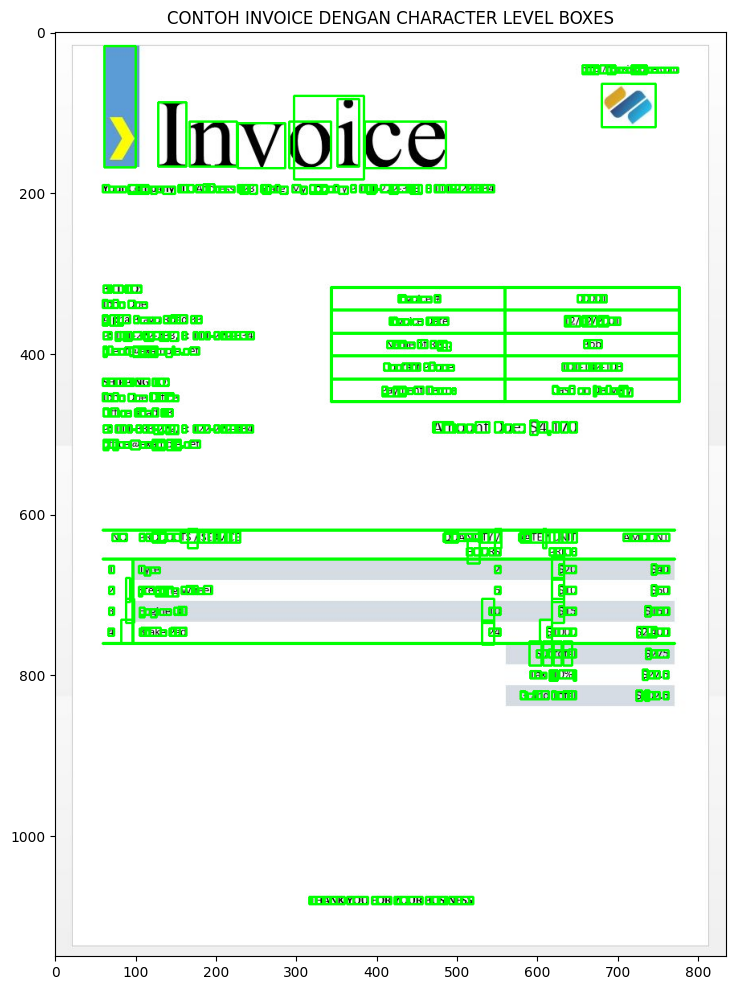

In [37]:
# Membaca gambar dari direktori
image = cv2.imread(IMG_DIR + 'invoice-sample.jpg')

# Mendapatkan dimensi tinggi (h), lebar (w), dan channel warna (c) dari gambar
h, w, c = image.shape

# Menggunakan pytesseract.image_to_boxes() untuk mendapatkan informasi kotak karakter
boxes = pytesseract.image_to_boxes(image)

# Iterasi melalui setiap baris hasil dan membuat kotak pada gambar menggunakan OpenCV
for b in boxes.splitlines():
    b = b.split(' ')
    image = cv2.rectangle(image, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)

# Memisahkan channel warna untuk mengonversi dari BGR ke RGB
b, g, r = cv2.split(image)
rgb_img = cv2.merge([r, g, b])

# Menampilkan gambar dengan kotak karakter
plt.figure(figsize=(16, 12))
plt.imshow(rgb_img)
plt.title('CONTOH INVOICE DENGAN CHARACTER LEVEL BOXES')
plt.show()


## 2. Bounding Box - Level Kata

langkah Selanjutnya kita akan menggunakan gambar contoh invoice di atas untuk menguji hasil output dari Tesseract.

Pada Code berikut akan digunakan untuk membaca gambar contoh invoice, kemudian menggunakan fungsi pytesseract.image_to_data() untuk mendapatkan data teks dari gambar.

---



In [38]:
# Membaca gambar contoh invoice
image = cv2.imread(IMG_DIR + 'invoice-sample.jpg')

# Menggunakan pytesseract.image_to_data() untuk mendapatkan data teks dari gambar
d = pytesseract.image_to_data(image, output_type=Output.DICT)

# Menampilkan kunci-kunci data yang diperoleh dari hasil OCR
print('DATA KEYS: \n', d.keys())


DATA KEYS: 
 dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


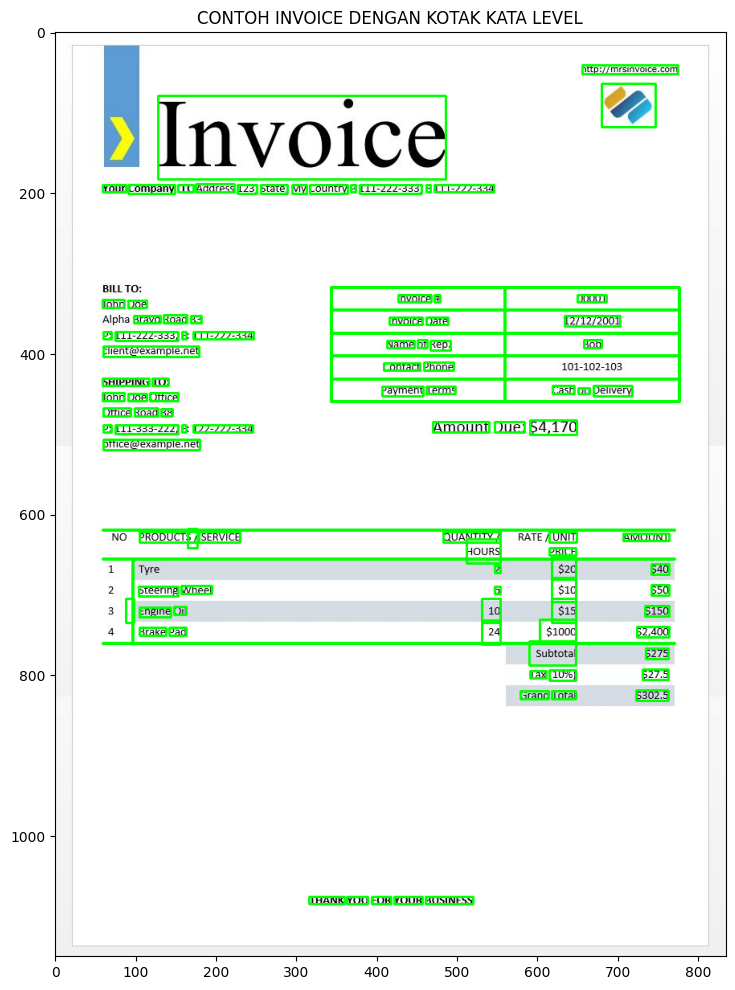

In [39]:
n_boxes = len(d['text'])
for i in range(n_boxes):
    # Kondisi untuk hanya memilih kotak dengan kepercayaan > 60%
    if int(d['conf'][i]) > 60:
        # Mendapatkan koordinat dan ukuran kotak kata
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        # Membuat kotak pada gambar untuk kata dengan kepercayaan > 60%
        image = cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Memisahkan channel warna untuk mengonversi dari BGR ke RGB
b, g, r = cv2.split(image)
rgb_img = cv2.merge([r, g, b])

# Menampilkan gambar dengan kotak kata berdasarkan kepercayaan > 60%
plt.figure(figsize=(16, 12))
plt.imshow(rgb_img)
plt.title('CONTOH INVOICE DENGAN KOTAK KATA LEVEL')
plt.show()


## 3. Text template matching - Pola Regex

---



Di sini, template yang kita akan gunakan berupa pola ekspresi reguler yang akan kita cocokkan dengan hasil OCR kita untuk menemukan kotak-kotak pembatas yang sesuai. Kita akan menggunakan modul regex dan fungsi image_to_data untuk hal ini.

---



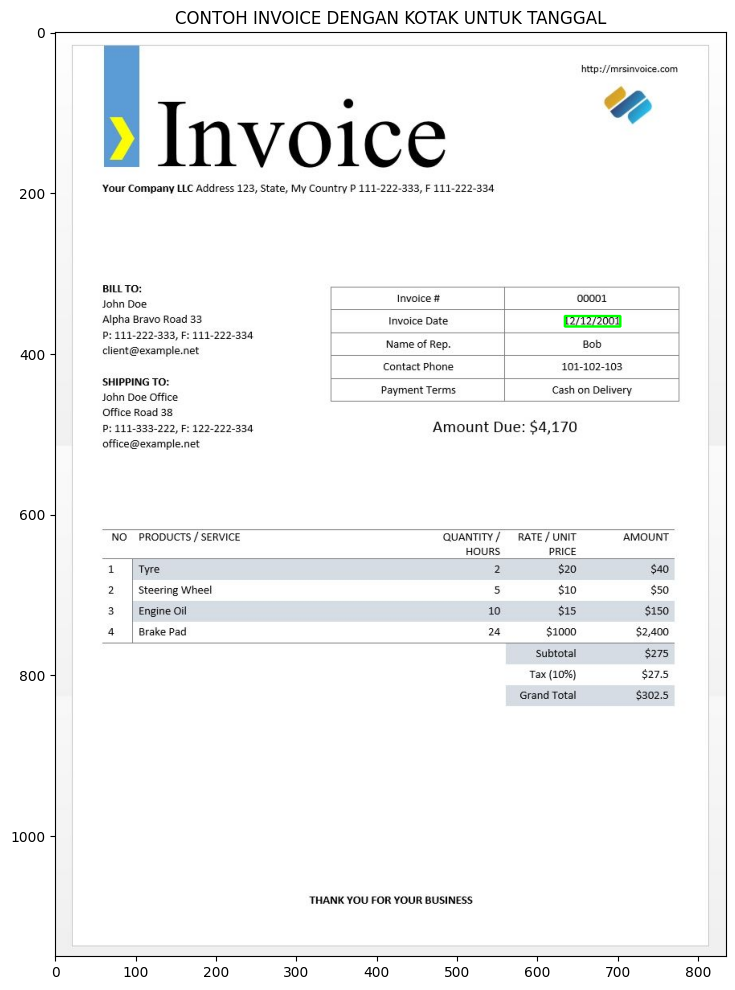

In [40]:
image = cv2.imread(IMG_DIR + 'invoice-sample.jpg')

# Pola tanggal dalam format dd/mm/yyyy
date_pattern = '^(0[1-9]|[12][0-9]|3[01])/(0[1-9]|1[012])/(19|20)\d\d$'

n_boxes = len(d['text'])
for i in range(n_boxes):
    # Memeriksa apakah kotak memiliki tingkat kepercayaan lebih dari 60%
    if int(d['conf'][i]) > 60:
        # Memeriksa apakah teks di dalam kotak sesuai dengan pola tanggal
        if re.match(date_pattern, d['text'][i]):
            # Mendapatkan koordinat dan ukuran kotak kata
            (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
            # Membuat kotak pada gambar untuk tanggal yang sesuai dengan pola
            image = cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Memisahkan channel warna untuk mengonversi dari BGR ke RGB
b, g, r = cv2.split(image)
rgb_img = cv2.merge([r, g, b])

# Menampilkan gambar dengan kotak-kotak yang menandai lokasi tanggal
plt.figure(figsize=(16, 12))
plt.imshow(rgb_img)
plt.title('CONTOH INVOICE DENGAN KOTAK UNTUK TANGGAL')
plt.show()


In [59]:
image = cv2.imread(IMG_DIR + 'invoice-sample.jpg')
text = pytesseract.image_to_string(image)
print(text)

, Invoice

Your Company LLC Address 123, State, My Country P 111-222-333, F 111-222-334

BILL TO:
John Doe

Alpha Bravo Road 33

P: 111-222-338, F: 111-222-334
client@example.net

SHIPPING TO:
John Doe Office

Office Road 38,

P: 111-383-222, F: 122-222-834
office@example.net

http://mrsinvoice.com

 

 

 

 

 

Invoice # 00001
Invoice Date 12/12/2001
Name of Rep. Bob

Contact Phone 101-102-103

 

Payment Terms

 

 

Cash on Delivery

 

 

Amount Due: $4,170

 

 

 

 

NO PRODUCTS / SERVICE QUANTITY / RATE / UNIT AMOUNT
HOURS: PRICE

1 aye 2 $20 $40

2 | Steering Wheel 5 $10 $50

3 | Engine oil 10 $15 $150

4 | Brake Pad 24 $1000 $2,400

Subtotal $275

Tax (10%) $27.5

Grand Total $202.5

‘THANK YOU FOR YOUR BUSINESS.



## 4. Deteksi berbagai bahasa - OCR

---



Untuk menetapkan bahasa yang diinginkan untuk hasil OCR Anda, gunakan argumen -l LANG dalam konfigurasi di mana LANG adalah kode tiga huruf untuk bahasa yang ingin Anda gunakan.

Kode berikut digunakan untuk membaca dan menampilkan gambar yang berisi teks dalam beberapa bahasa. Gambar asli ditampilkan untuk memberikan gambaran tentang kontennya sebelum proses OCR.

---



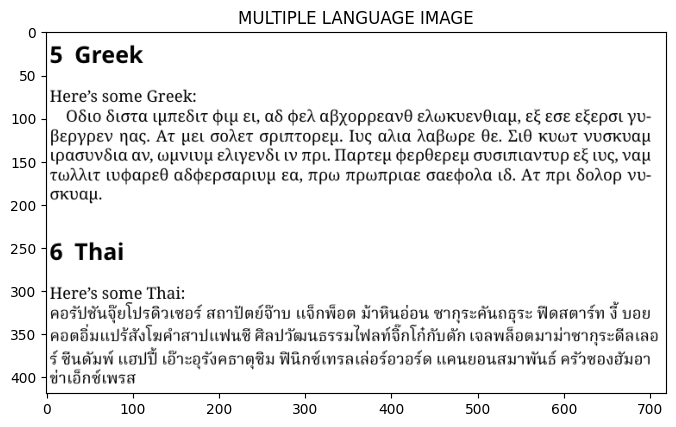

In [41]:
# Membaca gambar asli
image = cv2.imread(IMG_DIR + 'greek-thai.png')

# Memisahkan channel warna untuk mengonversi dari BGR ke RGB
b, g, r = cv2.split(image)
rgb_img = cv2.merge([r, g, b])

# Menampilkan gambar asli
plt.figure(figsize=(8, 16))
plt.imshow(rgb_img, cmap='gray')
plt.title('MULTIPLE LANGUAGE IMAGE')
plt.show()


Selanjutnya, Kode berikut digunakan untuk mengekstrak teks dari gambar dengan menggunakan Tesseract OCR. Konfigurasi khusus (custom_config) diterapkan dengan hanya menentukan bahasa Inggris (-l eng). Parameter lain seperti --oem 3 dan --psm 6 juga digunakan untuk mengoptimalkan hasil OCR sesuai kebutuhan.

---



In [42]:
# Output dengan hanya bahasa Inggris yang ditentukan

# Konfigurasi khusus dengan hanya bahasa Inggris yang diatur
custom_config = r'-l eng --oem 3 --psm 6'

# Menggunakan pytesseract.image_to_string() untuk mendapatkan teks dari gambar dengan konfigurasi khusus
print(pytesseract.image_to_string(image, config=custom_config))



5 Greek
Here’s some Greek:

OSto Stota tuMedit Huy et, aS ea aByoppeave edAwkvevOuay, e§ ece efepot yu-
Bepypev nas. AT Wel GoAET apiTtopen. Tug aAta AaBwpe Ve. LO KUWT VUoKLaL
(paovvéia av, WUVLUU eAtyevil tv mpL TMaptep bepSepey GvaTLAaVTUp e€€ LUG, Va
TWAALT LUdaped ASdepoapluy Ea, TOW TpwTplae Gaedoda 16. AT mpt SoAop vv-
oxvau.

6 Thai

Here’s some Thai: .
aosUsugulushawos amiaddw usntioa sinfudou winszduagss Haaonsn 3 vos
Aonduusaladrawunud AavTausssulwavianlAdudn wandoamnsiwinsedataa
$ Guduvi woud rvaseasiadu Windinsadosor0sa uausouanrwus aswouduer
didadinsa



# Tugas

Mendeteksi orientasi teks dan jenis skrip
Tugas ini bertujuan untuk mendeteksi orientasi teks dan jenis skrip yang digunakan dalam suatu gambar menggunakan tesseract.

Tugas:

## 1. Persiapan Gambar:

    - Gunakan gambar contoh yang disediakan ('hitchhikers-rotated.png')
    - Tampilkan gambar asli menggunakan Python dan OpenCV.

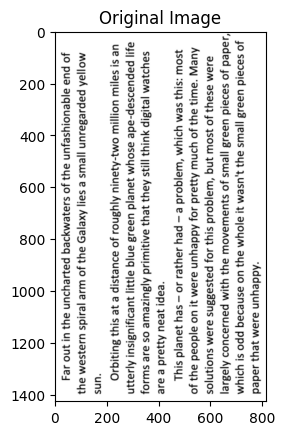

In [64]:
import cv2
import pytesseract
from matplotlib import pyplot as plt

# Load the image
IMG_DIR = '/content/drive/MyDrive/ratna/ML/Images/'  # Assuming the image is in your Images folder
image_path = IMG_DIR + 'hitchhikers-rotated.png'
image = cv2.imread(image_path)

# Display the original image
b, g, r = cv2.split(image)
rgb_img = cv2.merge([r, g, b])  # Convert to RGB for display
plt.imshow(rgb_img)
plt.title('Original Image')
plt.show()

##  2. Deteksi Orientasi dan Skrip:

    - Implementasikan skrip Python untuk mendeteksi orientasi teks dalam gambar.
    - Gunakan Tesseract untuk mendapatkan sudut rotasi (angle) dan jenis skrip (script).

In [73]:
import subprocess
from PIL import Image
from google.colab.patches import cv2_imshow


import cv2
import numpy as np
from PIL import Image
import pytesseract


# Save the image to a temporary file (Tesseract requires file input)
temp_image_path = '/content/drive/MyDrive/ratna/ML/Images/tmp_image.png'
cv2.imwrite(temp_image_path, image)

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply edge detection to find potential lines
edges = cv2.Canny(gray_image, 50, 150, apertureSize=3)

# Use Hough Line Transform to detect lines in the image
lines = cv2.HoughLines(edges, 1, np.pi / 180, 100)

# Calculate the average angle of detected lines
if lines is not None:
    angles = []
    for line in lines:
        rho, theta = line[0]
        angle = theta * (180 / np.pi)
        angles.append(angle)
    average_angle = np.mean(angles)
else:
    average_angle = 0

# Detect script type
script_type = pytesseract.image_to_string(Image.fromarray(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB)), config=custom_config)

print(f'Jenis Skrip: \n{script_type}')




Jenis Skrip: 
Far out in the uncharted backwaters of the unfashionable end of
the western spiral arm of the Galaxy lies a small unregarded yellow
sun.

Orbiting this at a distance of roughly ninety-two million miles is an
utterly insignificant little blue green planet whose ape-descended life
forms are so amazingly primitive that they still think digital watches
are a pretty neat idea.

This planet has — or rather had — a problem, which was this: most
of the people on it were unhappy for pretty much of the time. Many
solutions were suggested for this problem, but most of these were
largely concerned with the movements of small green pieces of paper,
which is odd because on the whole it wasn't the small green pieces of
paper that were unhappy.



Sudut Rotasi: 98.60114180754755 degrees


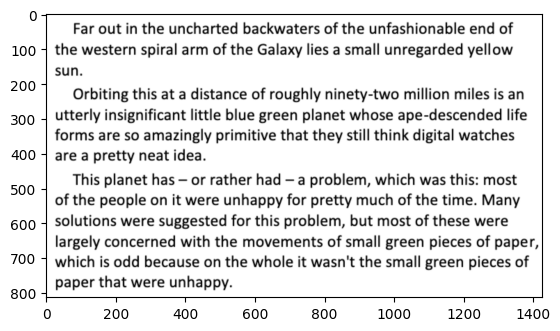

In [70]:
# Rotate the image based on the calculated average angle
rotated_image = image.copy()
if abs(average_angle) > 1:  # Adjust this threshold as needed
    rotated_image = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE if average_angle > 0 else cv2.ROTATE_90_COUNTERCLOCKWISE)

# Save the rotated image to a temporary file
cv2.imwrite(temp_image_path, rotated_image)

# Display results
print(f'Sudut Rotasi: {average_angle} degrees')

# Display the rotated image
plt.imshow(rotated_image)

kedua script diatas bisa digabungkan karena saling berkaitan

---



code buat deteksi yang belum dirotasi dan sudah dirotasi

---



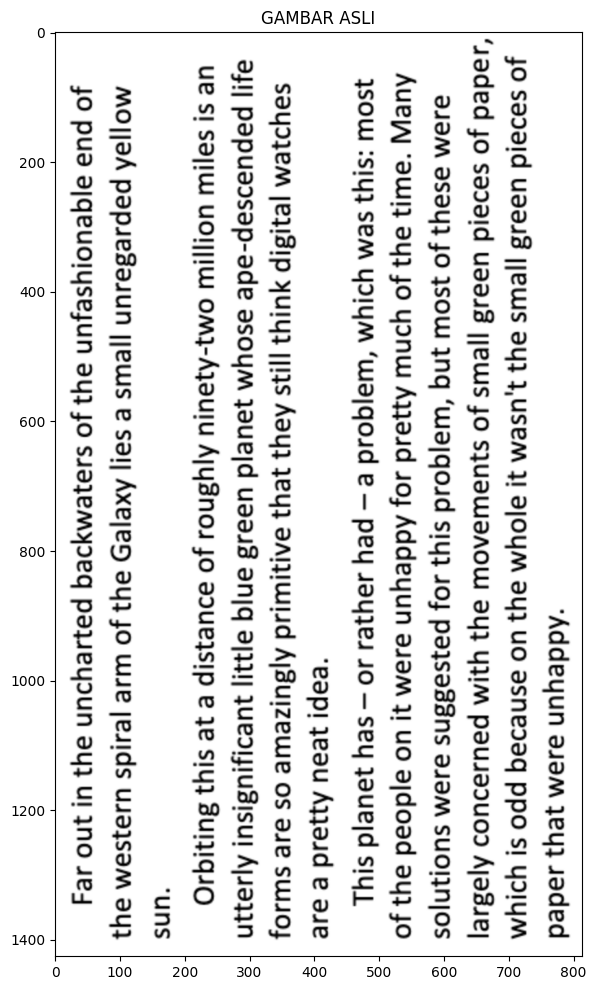

Sudut Rotasi Teks: 90.0 derajat
Jenis Skrip: Latin
Teks Sebelum diRotasi: 
‘Addeyun asam jeu} Jaded

jo sadaid uae8 |jeWS Jy} },USeM }! BJOYM Uy} UO asnedaq ppo Ss! YDIUM

‘1aded jo sadaid uaai3 |jelWs JO SJUBLUAAOW 94} YIM pausaoUOD Ajazie|

3JIM BSU} JO JSOW Ng ‘Wajqod siy} JO} pajsadsns a1aM suO!yNjOs

Aue ‘awi} ay} Jo YOnwW Ayasd 10} Addeyun asam 3 UO ajdoad ay} Jo
JSOW :SIy} SEM YDIYM ‘Wajqoid e — pey Jayjes JO — sey Jaueld siyy

“eap! yeau Ajjaud e aue

SAYIIEM [eUSIP YUIY} []19S Ady. JEU} SAIZILULId AjsulZeWe Os ase SWIOJ

a}1| Papusdsap-ade ssoUM JoueR|d UBeI3 an|g aj}qI] JUeDIJIUSISU! AjJa}4N
ue SI Saji UOI||IWW OMj-AjauIU A]YBNOJ JO adUejSIP e Je SIY} BUIZIGIO

‘uns

MO}||aA papsesaiun |jews e salj Axejed ay} JO Wie jesIds Ua}saM au}
JO pua ajqeuolysejun ay} JO SsajzeMyIeG PayeyouN au} ul yNo Je



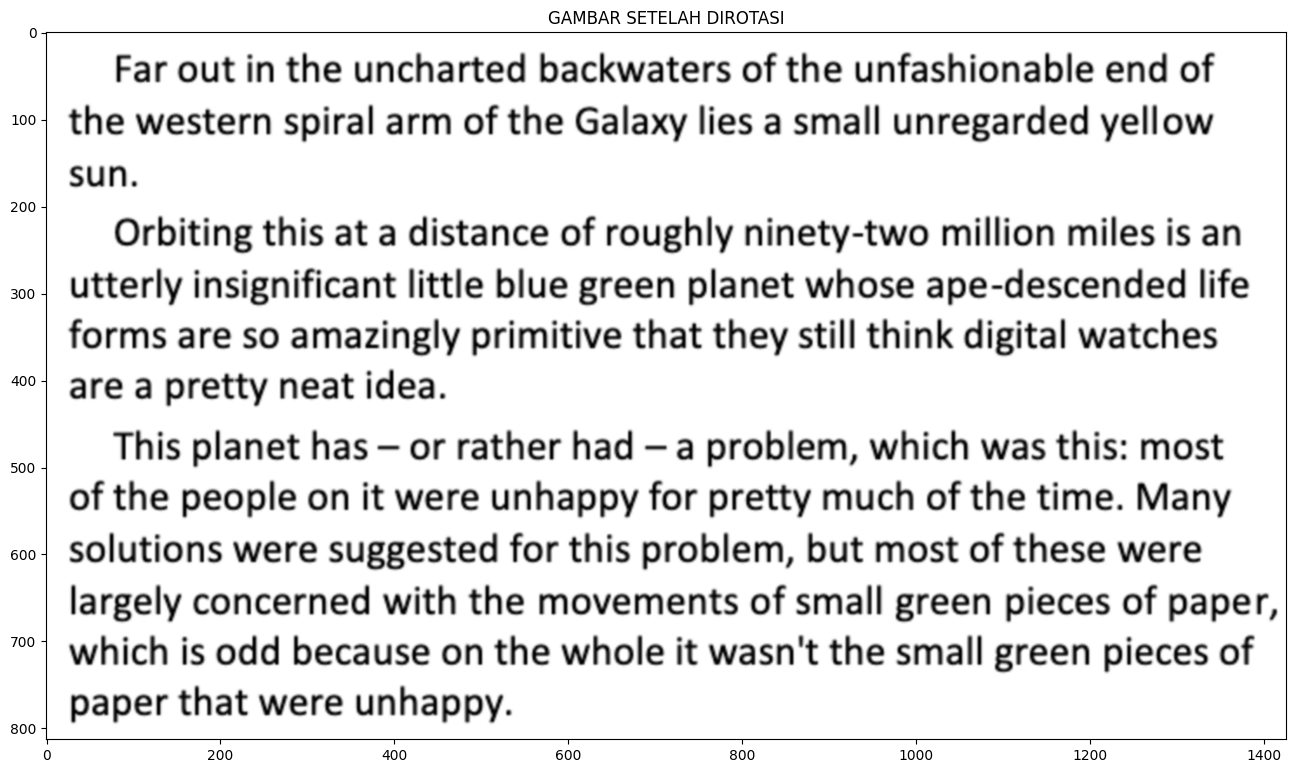

Sudut Rotasi Teks Setelah Rotasi: 0.0 derajat
Jenis Skrip Setelah Rotas: Latin
Teks Setelah Rotasi: 
 

 

Far out in the uncharted backwaters of the unfashionable end of
the western spiral arm of the Galaxy lies a small unregarded yellow
sun.

Orbiting this at a distance of roughly ninety-two million miles is an
utterly insignificant little blue green planet whose ape-descended life
forms are so amazingly primitive that they still think digital watches
are a pretty neat idea.

This planet has — or rather had —a problem, which was this: most
of the people on it were unhappy for pretty much of the time. Many
solutions were suggested for this problem, but most of these were
largely concerned with the movements of small green pieces of paper,
which is odd because on the whole it wasn't the small green pieces of
paper that were unhappy.



In [75]:
import cv2
import pytesseract
from matplotlib import pyplot as plt

def get_text_orientation_and_script(image):
    # Gunakan Tesseract untuk mendeteksi teks
    text = pytesseract.image_to_string(image)

    # Mendapatkan sudut rotasi
    osd = pytesseract.image_to_osd(image)
    rotation_angle = float(osd.split('\n')[2].split(':')[1])

    return text, rotation_angle

def detect_script_type(image):
    # Ubah gambar ke skala abu-abu
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Ambil tepi menggunakan Canny
    edges = cv2.Canny(gray, 50, 150)

    # Temukan kontur pada gambar
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Inisialisasi daftar untuk menyimpan hasil deteksi jenis skrip
    detected_script_types = []

    # Loop melalui setiap kontur
    for contour in contours:
        # Peroleh kotak pembatas dari kontur
        x, y, w, h = cv2.boundingRect(contour)

        # Deteksi jenis skrip berdasarkan properti ROI
        aspect_ratio = w / h if h != 0 else 0  # Hindari pembagian oleh 0
        if aspect_ratio > 0.5:
            detected_script_types.append("Latin")
        else:
            detected_script_types.append("Non-Latin")

    # Jika lebih dari setengah ROI terdeteksi sebagai jenis skrip Latin, maka hasilnya "Latin"
    if detected_script_types.count("Latin") > len(detected_script_types) / 2:
        return "Latin"
    else:
        return "Non-Latin"

def rotate_image(image, angle):
    height, width = image.shape[:2]
    center = (width // 2, height // 2)

    # Use a negative angle to rotate clockwise
    matrix = cv2.getRotationMatrix2D(center, -angle, 1.0)

    # Hitung ukuran gambar yang diperlukan setelah rotasi
    rotated_height = int(abs(matrix[0, 0] * height) + abs(matrix[0, 1] * width))
    rotated_width = int(abs(matrix[0, 1] * height) + abs(matrix[0, 0] * width))

    # Sesuaikan matriks rotasi untuk memastikan seluruh gambar dapat ditampilkan
    matrix[0, 2] += (rotated_width - width) / 2
    matrix[1, 2] += (rotated_height - height) / 2

    rotated_image = cv2.warpAffine(image, matrix, (rotated_width, rotated_height))
    return rotated_image

def main():
    # Membaca gambar dari direktori
    image = cv2.imread('/content/drive/MyDrive/ratna/ML/Images/hitchhikers-rotated.png')

    plt.figure(figsize=(16, 12))
    plt.imshow(image)
    plt.title('GAMBAR ASLI')
    plt.show()

    # Dapatkan teks, orientasi teks, dan jenis skrip
    text, rotation_angle = get_text_orientation_and_script(image)

    # Dapatkan gambar setelah dirotasi
    rotated_image = rotate_image(image, rotation_angle)

    # Dapatkan teks setelah dirotasi
    text_rotation, rotaion_angle_after_rotation = get_text_orientation_and_script(rotated_image)

    # Dapatkan jenis skrip
    script_type = detect_script_type(image)

    # Dapatkan jenis skrip setelah dirotasi
    script_type_rotasi = detect_script_type(rotated_image)

    # Tampilkan hasil
    print(f"Sudut Rotasi Teks: {rotation_angle} derajat")
    print(f"Jenis Skrip: {script_type}")
    print(f"Teks Sebelum diRotasi: \n{text}")

    # Tampilkan gambar yang sudah dirotasi
    plt.figure(figsize=(16, 12))
    plt.imshow(rotated_image)
    plt.title('GAMBAR SETELAH DIROTASI')
    plt.show()

    print(f"Sudut Rotasi Teks Setelah Rotasi: {rotaion_angle_after_rotation} derajat")
    print(f"Jenis Skrip Setelah Rotas: {script_type_rotasi}")
    print(f"Teks Setelah Rotasi: \n{text_rotation}")

if __name__ == "__main__":
    main()

## Kesimpulan

---


Program di atas mengimplementasikan deteksi sudut rotasi dan pengenalan teks pada suatu gambar menggunakan teknik deteksi garis dengan Hough Line Transform dan Optical Character Recognition (OCR) dengan Tesseract. Gambar disimpan ke file sementara, kemudian diubah ke skala abu-abu dan dikenai deteksi tepi.

Deteksi garis menggunakan transformasi Hough Line, diikuti dengan perhitungan rata-rata sudut garis untuk mendeteksi rotasi. Jika sudut rata-rata signifikan, gambar diputar searah atau berlawanan arah jarum jam sesuai dengan nilai sudut tersebut.

Setelah rotasi, program menggunakan Tesseract untuk melakukan OCR dan mendapatkan jenis teks pada gambar. Hasil akhirnya adalah informasi tentang sudut rotasi dan jenis teks yang diprint.